In [333]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import re
from matplotlib import rc
# import matplotlib.font_manager as fm

# 간단한 전처리
### 1) datatype 형변환
### 2) 필요한 변수 열 추가
- 년/월/일
- 성별
- 할부 여부
- 판매 개수

In [16]:
! pip3 install seaborn

     |████████████████████████████████| 215 kB 305 kB/s eta 0:00:01


In [288]:
mydata = pd.read_csv("dummy1.csv", thousands = ',')

In [289]:
# 각각의 타입보기

print(type(mydata['datetime'][0]))
print(type(mydata['category'][0]))
print(type(mydata['name'][0]))
print(type(mydata['mother_code'][0]))
print(type(mydata['revenue'][0]))
print(type(mydata['price'][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [95]:
# 가격 실수형으로 변환
mydata['price'] = mydata['price'].str.replace(',','')
mydata['price'] = mydata['price'].str.replace('   ','')
mydata['price'] = mydata['price'].str.replace('    ','')

In [165]:
mydata.apply(pd.to_numeric, errors = 'coerce') 
mydata['price'] = pd.to_numeric(mydata['price'])

In [96]:
# 매출 실수형으로 변환
pd.to_numeric(mydata['revenue'])

0        2099000.0
1        4371000.0
2        3262000.0
3        6955000.0
4        6672000.0
           ...    
38304          NaN
38305          NaN
38306          NaN
38307          NaN
38308          NaN
Name: revenue, Length: 38309, dtype: float64

In [293]:
# 매출 실수형으로 변환
mydata['month'] = pd.to_numeric(mydata['month'])
mydata['date'] = pd.to_numeric(mydata['date'])
mydata['year'] = pd.to_numeric(mydata['year'])

In [294]:
mydata

,Unnamed: 0,datetime,exposure,mother_code,code,name,category,price,revenue,year,month,date,time,count,sex,installment
0,0,2019.1.1 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,2099000.0,2019,1,1,6:00,52.606516,남성,무관
1,1,2019.1.1 6:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900.0,4371000.0,2019,1,1,6:00,109.548872,여성,무관
2,2,2019.1.1 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,3262000.0,2019,1,1,6:20,81.754386,남성,무관
3,3,2019.1.1 6:20,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900.0,6955000.0,2019,1,1,6:20,174.310777,여성,무관
4,4,2019.1.1 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,6672000.0,2019,1,1,6:40,167.218045,남성,무관
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38304,38304,2020.1.1 0:20,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,0:20,NaN,무관,무관
38305,38305,2020.1.1 0:40,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,0:40,NaN,무관,무관
38306,38306,2020.1.1 1:00,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,1:00,NaN,무관,무관
38307,38307,2020.1.1 1:20,20.0,100490,201478,더케이 예다함 상조서비스(티포트),무형,NaN,NaN,2020,1,1,1:20,NaN,무관,무관


In [111]:
# 시간 분리
mydata[['year','month','date']] = pd.DataFrame(mydata.datetime.str.split('.', 2).tolist())

In [113]:
mydata[['date', 'time']] = pd.DataFrame(mydata.date.str.split(' ', 1).tolist())

In [167]:
# 매출 / 단가 = count(수량) 변수로 추가
mydata['count'] = mydata['revenue'].div(mydata['price'], axis = 0)

In [168]:
mydata

,datetime,exposure,mother_code,code,name,category,price,revenue,year,month,date,time,count
0,2019.1.1 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,2099000.0,2019,1,1,6:00,52.606516
1,2019.1.1 6:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900.0,4371000.0,2019,1,1,6:00,109.548872
2,2019.1.1 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,3262000.0,2019,1,1,6:20,81.754386
3,2019.1.1 6:20,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900.0,6955000.0,2019,1,1,6:20,174.310777
4,2019.1.1 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,6672000.0,2019,1,1,6:40,167.218045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38304,2020.1.1 0:20,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,0:20,NaN
38305,2020.1.1 0:40,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,0:40,NaN
38306,2020.1.1 1:00,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,1:00,NaN
38307,2020.1.1 1:20,20.0,100490,201478,더케이 예다함 상조서비스(티포트),무형,NaN,NaN,2020,1,1,1:20,NaN


In [179]:
# 별로 좋은 방법은 아닌 것 같지만 pd다룰줄 몰라서... 
# sex(성별) 추가
for i in range(len(mydata)):
    if set(mydata['name'][i].split()) & {"남성"} :
        mydata['sex'][i] = "남성"
    elif set(mydata['name'][i].split()) & {"여성"} :
        mydata['sex'][i] = "여성"
    else :
        mydata['sex'][i] = "무관"

<ipython-input-179-35b7f07b7e81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['sex'][i] = "남성"
<ipython-input-179-35b7f07b7e81>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['sex'][i] = "여성"
<ipython-input-179-35b7f07b7e81>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['sex'][i] = "무관"


In [216]:
# 이것도 별로 좋은 방법은 아니지만 원소를 직접추가하는 것보다는 좀 나은듯
# installment(할부) 추가
installment = []

for i in range(len(mydata)):
    if set(re.split('\[|\]|\(\)| ', mydata['name'][i])) & {"무이자"} :
        installment.append("무이자")
    elif set(re.split('\[|\]|\(\)| ', mydata['name'][i])) & {"일시불"} :
        installment.append("일시불")
    else :
        installment.append("무관")

In [217]:
mydata['installment'] = installment

In [218]:
mydata

,datetime,exposure,mother_code,code,name,category,price,revenue,year,month,date,time,count,sex,installment
0,2019.1.1 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,2099000.0,2019,1,1,6:00,52.606516,남성,무관
1,2019.1.1 6:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900.0,4371000.0,2019,1,1,6:00,109.548872,여성,무관
2,2019.1.1 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,3262000.0,2019,1,1,6:20,81.754386,남성,무관
3,2019.1.1 6:20,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900.0,6955000.0,2019,1,1,6:20,174.310777,여성,무관
4,2019.1.1 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,6672000.0,2019,1,1,6:40,167.218045,남성,무관
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38304,2020.1.1 0:20,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,0:20,NaN,무관,무관
38305,2020.1.1 0:40,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,0:40,NaN,무관,무관
38306,2020.1.1 1:00,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,1:00,NaN,무관,무관
38307,2020.1.1 1:20,20.0,100490,201478,더케이 예다함 상조서비스(티포트),무형,NaN,NaN,2020,1,1,1:20,NaN,무관,무관


In [219]:
mydata.to_csv('/Users/aohus/Documents/workspaces/Python/BigContest/src/dummy1.csv', sep=',', na_rep='NaN')

# EDA 시각화

## 무엇을 시도해볼까?
1. 최고 매출 순으로 30개 정도 확인
2. 최고 count 순으로 30개 확인
    + 1,2 번은 마더코드 같은 것끼리는 더해서해야하나?
3. 카테고리
    + 카테고리별 평균 매출
    + 카테고리 + 성별 매출
    + 월별 카테고리의 변화
4. 성별
    + 성별에 따른 매출
5. 가격
6. 월별 매출

### 매출 순위별로 sort

In [229]:
mydata.sort_values(by='revenue' ,ascending=False)

,datetime,exposure,mother_code,code,name,category,price,revenue,year,month,date,time,count,sex,installment
35784,2019.12.7 1:40,17.0,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900.0,322009000.0,2019,12,7,1:40,8070.401003,무관,무관
37861,2019.12.27 0:00,20.0,100323,201025,피시원 국내산 햇 손질문어 7팩,농수축,49900.0,270284000.0,2019,12,27,0:00,5416.513026,무관,무관
34385,2019.11.22 19:00,20.0,100317,201665,국내산 손질 햇 갑오징어 9팩,농수축,49900.0,241079000.0,2019,11,22,19:00,4831.242485,무관,무관
35045,2019.11.29 23:00,NaN,100148,200412,LG 울트라HD TV 65UM7900BNA,가전,1700000.0,231789000.0,2019,11,29,23:00,136.346471,무관,무관
32371,2019.11.2 17:40,20.0,100849,202513,멋진밥상 흥양농협 햅쌀 20kg,농수축,58900.0,228177000.0,2019,11,2,17:40,3873.972835,무관,무관
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38304,2020.1.1 0:20,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,0:20,NaN,무관,무관
38305,2020.1.1 0:40,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,0:40,NaN,무관,무관
38306,2020.1.1 1:00,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,1:00,NaN,무관,무관
38307,2020.1.1 1:20,20.0,100490,201478,더케이 예다함 상조서비스(티포트),무형,NaN,NaN,2020,1,1,1:20,NaN,무관,무관


### price - revenue

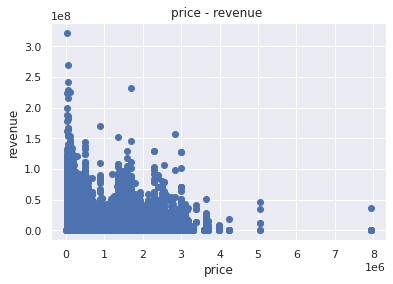

In [248]:
plt.scatter(mydata['price'], mydata['revenue'])
plt.title("price - revenue ")
plt.xlabel("price") 
plt.ylabel("revenue") 
plt.show()

#### price - revenue 특이사항
- 단가가 싼 제품일 중 좋은 매출을 거둔 것이 더 많다. (많이 살테니까)
- 엄청 비싸게 판 저거 뭐야ㅋㅋㅋㅋ
- 저 위에 동동 떠있는 애들 다시 살펴봐야한다. 
--------

### price - count

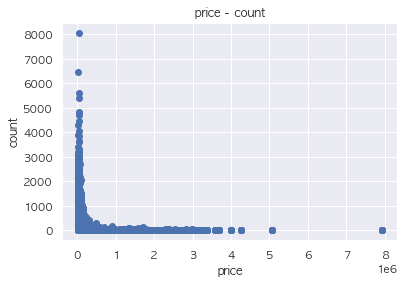

In [345]:
plt.scatter(mydata['price'], mydata['count'])
plt.title("price - count")
plt.xlabel("price") 
plt.ylabel("count") 
plt.show()

#### price-count 특이사항
- 이거 제대로 나오는 것 맞나...?
- 맞다면 홈쇼핑에는 가격장벽이 있는건가?
- 일정 수준의 가격대 이후에는 판매 개수가 비슷하다. 

-------

### count - revenue

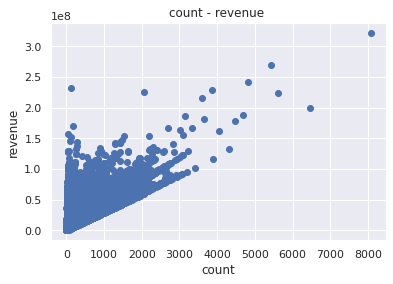

In [295]:
plt.scatter(mydata['count'], mydata['revenue'])
plt.title("count - revenue ")
plt.xlabel("count") 
plt.ylabel("revenue") 
plt.show()

#### count - revenue 특이사항
- count 변수를 내가 이상하게 설정했는지 다시 확인해야됨...
- 판매수량이 많을수록 총매출이 많은 것이 정상이지만 이 그래프 정말 신기하군
- 저 꼭대기에 있는 쟤는 4만원짜리 콩블리 자켓
-----

In [252]:
categorize = mydata['category'].groupby(mydata['category'])

In [254]:
categorize.size()

category
가구      2614
가전      6479
건강기능     790
농수축     3884
무형       937
생활용품    2877
속옷      3919
의류      4340
이미용     1305
잡화      3891
주방      6604
침구       669
Name: category, dtype: int64

In [297]:
mydata.groupby(mydata['category']).mean()

,Unnamed: 0,exposure,mother_code,code,price,revenue,year,month,date,count
category,,,,,,,,,,
가구,19004.451033,20.155290,100317.442234,201022.837414,8.434763e+05,1.115025e+07,2019.000000,6.537490,13.330910,17.379483
가전,15722.078562,20.130409,100239.960642,200749.129032,1.631382e+06,1.499100e+07,2019.000000,5.493286,14.223800,15.463927
건강기능,21313.616456,20.185868,100457.583544,201394.863291,8.332430e+04,2.544787e+07,2019.000000,7.108861,17.621519,372.739295
농수축,20234.693100,19.562685,100426.943615,201336.761586,4.641954e+04,4.272457e+07,2019.000000,6.819773,15.934861,972.194409
무형,26042.517609,22.871932,100449.779082,201540.766275,NaN,NaN,2019.005336,8.536820,16.591249,NaN
생활용품,24606.119221,20.094237,100395.612444,201227.961766,1.864539e+05,1.795182e+07,2019.000000,8.194995,15.727494,174.314027
속옷,17394.839245,20.182320,100460.445777,201430.046951,7.798127e+04,2.607730e+07,2019.000000,5.971166,15.710385,363.624486
의류,17945.519124,19.509259,100371.911060,201189.809217,1.554892e+05,2.437871e+07,2019.000000,6.134793,15.964747,384.164614
이미용,23090.176245,19.937795,100317.445211,201032.288123,5.103004e+04,3.779511e+07,2019.000000,7.723372,15.671264,801.696335


In [296]:
std_month = mydata.groupby(mydata['month']).mean()
std_month = std_month.sort_index(ascending=True)
print(std_month)

         Unnamed: 0   exposure    mother_code           code          price  \
month                                                                         
1       1553.884003  20.656775  100462.642313  201461.730956  383206.699063   
2       4285.500000  20.533497  100458.198294  201456.113717  454255.705652   
3       7339.000000  20.675827  100431.555117  201342.551169  442615.255542   
4      10728.500000  20.581462  100394.058233  201223.298049  618784.163493   
5      14288.500000  20.033714  100341.844799  201064.178041  674613.922450   
6      17643.500000  20.442341  100344.240572  201061.213589  439269.993358   
7      20878.000000  20.257834  100328.677277  201021.484822  506604.349776   
8      24183.000000  19.905997  100406.159154  201260.502021  526453.952821   
9      27403.000000  19.214516  100376.635743  201179.555073  434322.753438   
10     30615.500000  19.926486  100397.449407  201240.736727  373369.772358   
11     33682.000000  20.143743  100379.641760  20118

<AxesSubplot:xlabel='month'>

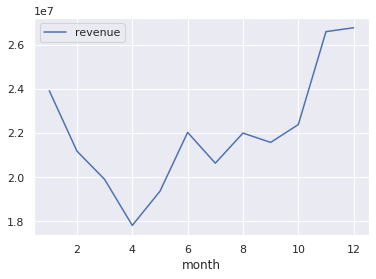

In [303]:
std_month.plot(y='revenue', use_index=True)

<AxesSubplot:xlabel='month'>

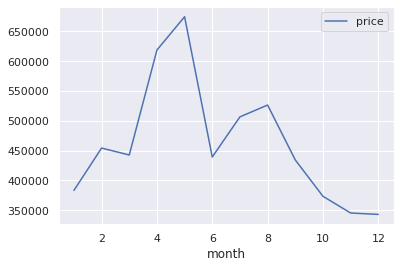

In [304]:
std_month.plot(y='price', use_index=True)

matplotlib.axes._subplots.AxesSubplot

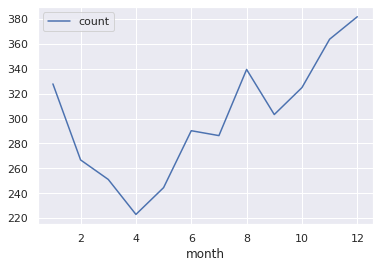

In [305]:
type(std_month.plot(y='count', use_index=True))

------

In [342]:
month_category = mydata["revenue"].groupby([mydata["month"], mydata["category"]]).sum().unstack("category")
month_category_mean = mydata["revenue"].groupby([mydata["month"], mydata["category"]]).mean().unstack("category")

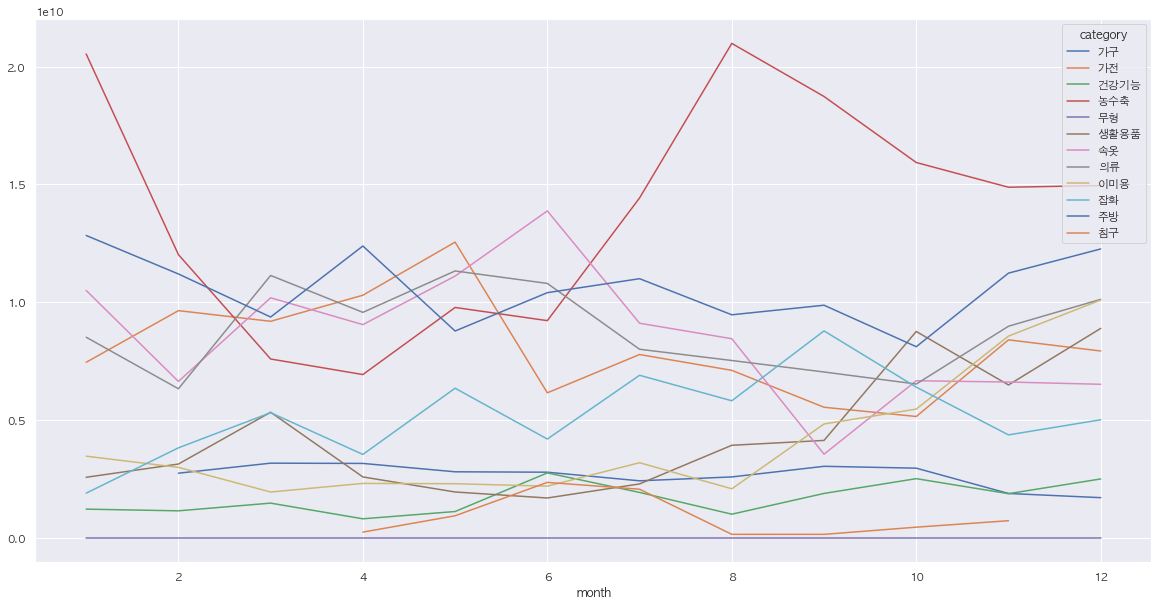

In [341]:
rc('font', family='AppleGothic')
month_category.plot(figsize=(20,10), grid = True);

#### 위 그래프 특이사항들
- 농수축은 왜때문에 저렇게 들쭉 날쭉한지 다시 분석해보기
- 속옷은 여름에 많이산다.
- 가전도 여름에 많이 사는 경향(에어컨 때문일까?)
- 침구도 여름에 많이 사네
- 이미용은 겨울에 많이 산다(보습 때문일까?)
- 의류도 여름에 매출이 살짝 높네(왜지? 겨울옷이 더 비싸긴할텐데)
- 생활용품도 여름보단 겨울(왜지? ㅇ_ㅇ 어떤 품목이 잘팔렸는지 좀 살펴봐야겠다)

#### '아 수화야! 평균도 살펴봐야지.... 그냥 빈도수가 많은 것일수도 있잖아'

----------

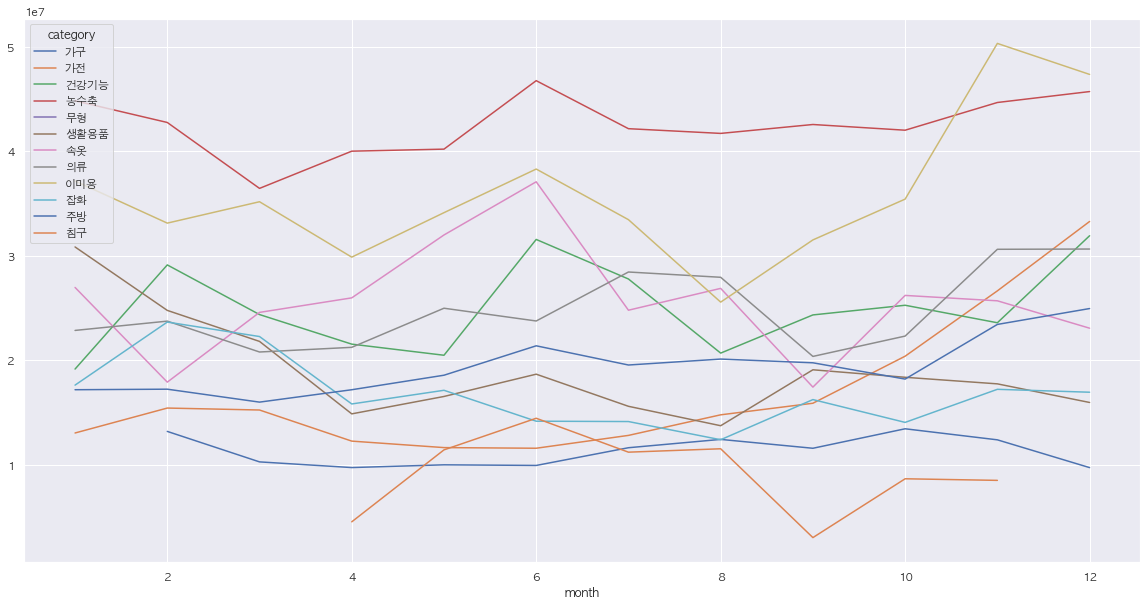

In [343]:
month_category_mean.plot(figsize=(20,10), grid = True);

#### 다시 특이사항
- 이미용은 겨울 > 여름 > 봄 > 가을
- 속옷은 여전히 여름에 잘팔린다.
- 평균으로보니 가전은 겨울(12월)에 잘 팔렸네? 여름엔 많이 팔았을 뿐인가?(매출합은 여름이 더 높은데!)
- 생활용품은겨울(1월)에 잘팔렸다.
- 건강기능도 6월이 살짝 높다.
- 나머지는 다 비슷한 것 같네 
- 보편적으로 매출이 좋은 것은 농수축(먹을 것) > 이미용(화장품) , 속옷, 건강기능식품, 의류 이정도